In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU, Dropout
from tensorflow.keras.optimizers import Adam

In [36]:
data = pd.read_excel("D:/AAU/Module_4/Project_mo_4/pune_tomato_market.xlsx")

In [37]:
data

,Date,Arrival,Price
0,2010-01-03,70.4,1300.0
1,2010-01-04,70.4,1300.0
2,2010-01-05,70.4,1300.0
3,2010-01-06,70.4,1300.0
4,2010-01-07,70.4,1300.0
...,...,...,...
5012,2023-09-24,235.0,700.0
5013,2023-09-25,223.0,700.0
5014,2023-09-26,246.0,600.0
5015,2023-09-27,166.0,550.0


In [ ]:
tomato_df = data[['Date','Price']]

In [ ]:
tomato_df

,Date,Price
0,2010-01-03,1300.0
1,2010-01-04,1300.0
2,2010-01-05,1300.0
3,2010-01-06,1300.0
4,2010-01-07,1300.0
...,...,...
5012,2023-09-24,700.0
5013,2023-09-25,700.0
5014,2023-09-26,600.0
5015,2023-09-27,550.0


In [ ]:
tomato_df
tomato_df.set_index('Date',inplace=True)

In [ ]:
# Normalize the data
scaler = MinMaxScaler()
scaled_cumin_gn = scaler.fit_transform(tomato_df)

In [ ]:
# Create sequences of data
sequence_length = 5 # Adjust as needed
X, y = [], []
for i in range(len(tomato_df) - sequence_length - 1):
    X.append(scaled_cumin_gn[i:i+sequence_length])
    y.append(scaled_cumin_gn[i+sequence_length+1])

In [43]:
X, y = np.array(X, dtype=np.float32), np.array(y,dtype=np.float32)

In [44]:
print(X.shape, y.shape)

(5011, 5, 1) (5011, 1)


In [45]:
# Split the data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

In [46]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4008, 5, 1) (1003, 5, 1) (4008, 1) (1003, 1)


In [47]:
# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50


251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0050 - val_loss: 0.0019
Epoch 2/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 3/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 4/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 5/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 6/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 7/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 8/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 9/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 10/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 9.7127e-04 - val_loss: 0.0017
Epoch 11/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 9.7248e-04 - val_loss: 0.0020
Epoch 12/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - 

In [51]:
y_pred = model.predict(X_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


In [52]:
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

In [53]:
X = np.array(X[-1])

In [ ]:
def pred_n_days(model, data, days):

    predictions = []

    for i in range(days): 

        data = data.reshape(5,1)
        data = np.expand_dims(data,axis=0)

        curr_pred = model.predict(data)
        curr_pred = curr_pred.reshape(1,1)
        predictions.append(curr_pred[0])

        curr_pred = np.expand_dims(curr_pred,axis=0)
        data= data[0][1:].reshape((1, 4, 1))
        data = np.concatenate((data,curr_pred),axis=1)

    return np.array(predictions)

In [55]:
predictions = pred_n_days(model,X,100)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━

In [56]:
predictions = scaler.inverse_transform(predictions)

In [57]:
days1 = np.arange(0,len(y_test))
days2 = np.arange(len(y_test),len(y_test)+100)

126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


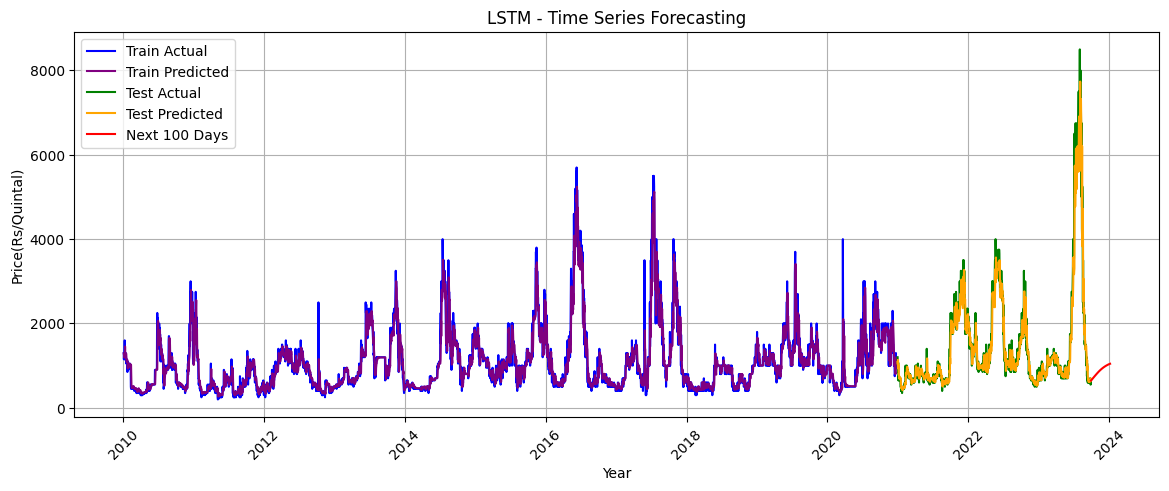

In [ ]:
# Convert the index (which is now 'Date') to datetime objects
tomato_df.index = pd.to_datetime(tomato_df.index)

# Get the dates for plotting
dates1 = tomato_df.index[-len(y_test):]
dates2 = pd.date_range(start=dates1[-1] + pd.Timedelta(days=1), periods=100) # Dates for the next 100 days

# Training Data Actual and Predicted
plt.figure(figsize=(14, 5))
plt.plot(tomato_df.index[:train_size], scaler.inverse_transform(y_train), label='Train Actual',color='blue')
train_predict = model.predict(X_train)
plt.plot(tomato_df.index[:train_size], scaler.inverse_transform(train_predict), label='Train Predicted',color='purple')


# Testing Data Actual and Predicted
plt.plot(dates1, y_test, color='green', label='Test Actual')
plt.plot(dates1, y_pred, color='orange', label='Test Predicted')


# Forecast for the next 100 days
plt.plot(dates2, predictions, color='red', label='Next 100 Days')


plt.title('LSTM - Time Series Forecasting')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Price(Rs/Quintal)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

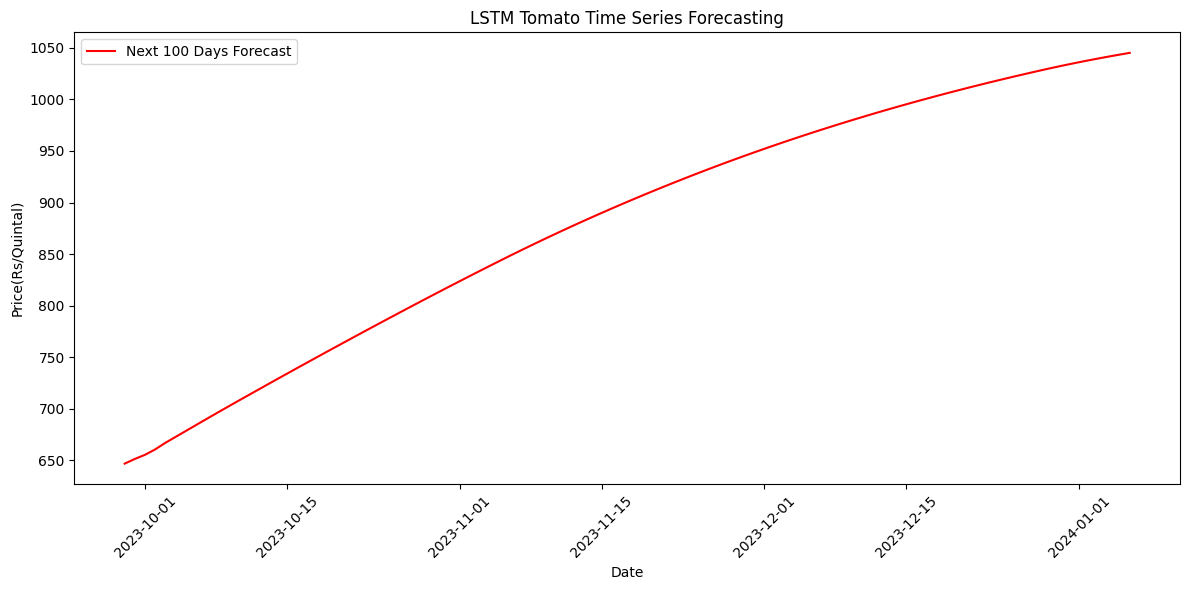

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(dates2, predictions, color='red', label='Next 100 Days Forecast')
plt.title('LSTM Tomato Time Series Forecasting')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price(Rs/Quintal)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [62]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.9121370773356805

In [71]:
from sklearn.metrics import mean_squared_error
y_true = y_test
y_pred = y_pred

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

# Calculate the range of the target variable
y_range = np.max(y_true) - np.min(y_true)

# Calculate the RMSE as a percentage of the range
rmse_percentage = (rmse / y_range) * 100

# Calculate NRMSE and NRMAE (normalized by mean and range)
mean_y_test = np.mean(y_test)
nrmse_by_mean = rmse / mean_y_test

print(f'Root Mean Squared Error (MSE) : {mse:.2f}')
print(f'Root Mean Squared Error (RMSE) : {rmse:.2f}')
print(f'Root Mean Squared Error (RMSE) as a percentage of the range: {rmse_percentage:.2f}%')
print(f"Normalized RMSE (NRMSE) by mean: {nrmse_by_mean:.2f}")

Root Mean Squared Error (MSE) : 120572.30
Root Mean Squared Error (RMSE) : 347.24
Root Mean Squared Error (RMSE) as a percentage of the range: 4.26%
Normalized RMSE (NRMSE) by mean: 0.23
